### Compute efficiency in unweighted network

In [1]:
import networkx as nx

def calculate_e_global(G):
    E = 0.0
    Eid = 0.0
    # compute shortest path lengths in weighted network
    path_lengths = nx.shortest_path_length(G)
    for i in path_lengths.values():
        for j in i.values():
            if j != 0:
                E += 1.0 / j
    # compute the efficieny in ideal G
    for x in G.nodes():
        for y in G.nodes():
            if x != y:
                Eid += 1
    # normalize E
    if Eid != 0:
        E = E / Eid
    else:
        E = 0
    return E
    
def calculate_e_local(G):
    avg = 0.0
    for node in G:
        # build a subgraph using neighbors of current node
        subGraph = G.subgraph(nx.bfs_successors(G,node)[node])
        avg += calculate_e_global(subGraph)
    avg = avg/len(G)
    return avg

def build_graph(cityName):
    with open("/home/czc/Documents/Data/quanturb-metro-network-data-cities-2009/" + cityName + "-2009-adjacency.net") as f:
        data =  f.readlines()
    stopdict = {}
    G = nx.Graph()
    for i in data:
        if i.split(" ")[-1] == '1\r\n': # The edge lines are ended with 1
            start = i.split(" ")[0]
            end = i.split(" ")[1]
            G.add_edge(start, end)
    return G

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

citylist = ["NewYork", "HongKong", "Madrid", "Chicago", "Berlin", "Beijing", "Barcelona", "Shanghai", "Tokyo", "Paris", "Seoul", "Moscow", "Mexico", "Osaka", "London"]
Eglobs = []
Elocs = []
for i in citylist:
    G = build_graph(i)
    eglob = calculate_e_global(G)
    eloc = calculate_e_local(G)
    print i, "eglob = ", eglob
    print i, "eloc = ", eloc
    Eglobs.append(eglob)
    Elocs.append(eloc)

NewYork eglob =  0.0732230925809
NewYork eloc =  0.017277026284
HongKong eglob =  0.150245958251
HongKong eloc =  0.00609756097561
Madrid eglob =  0.120476760921
Madrid eloc =  0.00614035087719
Chicago eglob =  0.114162607041
Chicago eloc =  0.0182033096927
Berlin eglob =  0.109005791837
Berlin eloc =  0.00588235294118
Beijing eglob =  0.149773533382
Beijing eloc =  0.0201923076923
Barcelona eglob =  0.14413603838
Barcelona eloc =  0.008984375
Shanghai eglob =  0.119685146129
Shanghai eloc =  0.00292792792793
Tokyo eglob =  0.137223621792
Tokyo eloc =  0.0236705434862
Paris eglob =  0.116207527235
Paris eloc =  0.0215320910973
Seoul eglob =  0.0762680146974
Seoul eloc =  0.00595238095238
Moscow eglob =  0.151920095643
Moscow eloc =  0.0195273631841
Mexico eglob =  0.134071376436
Mexico eloc =  0.00340136054422
Osaka eglob =  0.162369801757
Osaka eloc =  0.0
London eglob =  0.105336552759
London eloc =  0.0365198711063


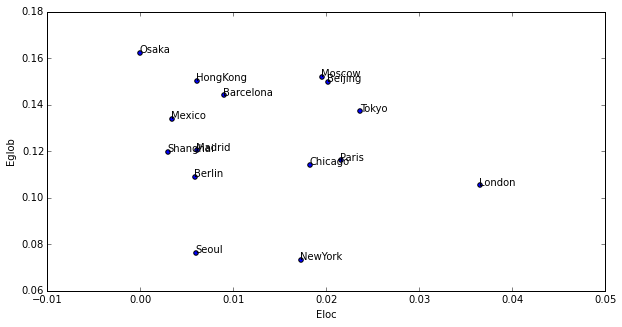

In [10]:
fig = plt.figure(figsize=(10, 5),facecolor='white')
ax = fig.add_subplot(1,1,1)
Elocs = [i + 0.000001 for i in Elocs]
ax.scatter(Elocs, Eglobs, c = 'b')
for i,j in enumerate(citylist):
    plt.text(Elocs[i], Eglobs[i], j)
#ax.set_xticks([ i+0.5 for i in range(len(citylist))])
#ax.set_xticklabels(citylist, rotation= 45)
plt.ylabel('Eglob')
plt.xlabel('Eloc')
#plt.xscale('log')
plt.show()

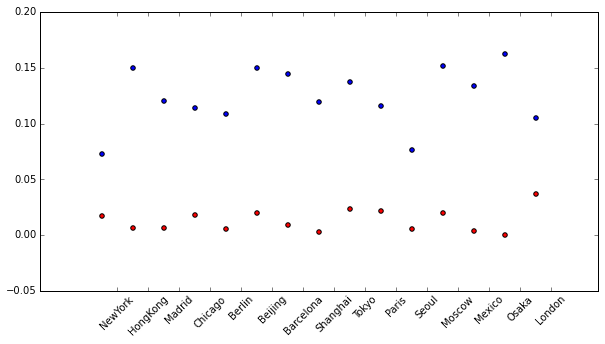

In [3]:
fig = plt.figure(figsize=(10, 5),facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(citylist)), Eglobs, c = 'b')
ax.scatter(range(len(citylist)), Elocs, c = 'r')
ax.set_xticks([ i+0.5 for i in range(len(citylist))])
ax.set_xticklabels(citylist, rotation= 45)
# plt.ylabel('Eglob')
# plt.yscale('log')
plt.show()

### Compute efficiency in weighted network

In [11]:
from math import *
import networkx as nx
import string

def dis(lat1,lon1,lat2,lon2):
    R = 6373.0 # convert Earth's radius in kilometers
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

def calculate_e_global_with_weight(G):
    E = 0.0
    Eid = 0.0
    lats = nx.get_node_attributes(G, 'lat')
    lons = nx.get_node_attributes(G, 'lon')
    # compute shortest path lengths in weighted network
    path_lengths = nx.shortest_path_length(G, weight = 'weight')
    for i in path_lengths.values():
        for j in i.values():
            if j != 0:
                E += 1.0 / j
    # compute the efficieny in ideal G
    for x in G.nodes():
        for y in G.nodes():
            if x != y:
                l = dis(string.atof(lats[x]), 
                        string.atof(lons[x]), 
                        string.atof(lats[y]), 
                        string.atof(lons[y]))
                if l != 0:
                    Eid += 1.0 / l
    # normalize E
    if Eid != 0:
        E = E / Eid
    else:
        E = 0
    return E
    
def calculate_e_local_with_weight(G):
    avg = 0.0
    for node in G:
        # build a subgraph using neighbors of current node
        subGraph = G.subgraph(nx.bfs_successors(G,node)[node])
        avg += calculate_e_global_with_weight(subGraph)
    avg = avg/len(G)
    return avg

def build_graph(cityName):
    with open("/home/czc/Documents/Data/quanturb-metro-network-data-cities-2009/" + cityName + "-2009-adjacency.net") as f:
        data =  f.readlines()
    G = nx.Graph()
    for i in data:
        if i.split(" ")[-1] == '0\r\n': # The stop lines are ended with 0
            stop_id = i.split(" ")[0]
            stop_name = i.split(" ")[1][1:-1]
            stop_lat = i.split(" ")[2]
            stop_lon = i.split(" ")[3]
            G.add_node(stop_id, name = stop_name, lat = stop_lat, lon = stop_lon)
    lats = nx.get_node_attributes(G, 'lat')
    lons = nx.get_node_attributes(G, 'lon')
    for i in data:
        if i.split(" ")[-1] == '1\r\n': # The edge lines are ended with 1
            start = i.split(" ")[0]
            end = i.split(" ")[1]
            # compute geodistance between i,j in edges of G
            geodistance = dis(string.atof(lats[start]), 
                              string.atof(lons[start]), 
                              string.atof(lats[end]), 
                              string.atof(lons[end]))
            # add weight to each edges
            G.add_edge(start, end, weight = geodistance)
    return G

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline

citylist = ["NewYork", "HongKong", "Madrid", "Chicago", "Berlin", "Beijing", "Barcelona", "Shanghai", "Tokyo", "Paris", "Seoul", "Moscow", "Mexico", "Osaka", "London"]
Eglobs = []
Elocs = []
for i in citylist:
    G = build_graph(i)
    eglob = calculate_e_global_with_weight(G)
    eloc = calculate_e_local_with_weight(G)
    print i, "eglob = ", eglob
    print i, "eloc = ", eloc
    Eglobs.append(eglob)
    Elocs.append(eloc)

NewYork eglob =  0.456902491531
NewYork eloc =  0.0214159941472
HongKong eglob =  0.691950073921
HongKong eloc =  0.0086679239719
Madrid eglob =  0.698131375437
Madrid eloc =  0.00940506550975
Chicago eglob =  0.688879922966
Chicago eloc =  0.0246536199797
Berlin eglob =  0.76774320445
Berlin eloc =  0.0101252549394
Beijing eglob =  0.811090878268
Beijing eloc =  0.02097079582
Barcelona eglob =  0.716385038008
Barcelona eloc =  0.0145629709643
Shanghai eglob =  0.743953717112
Shanghai eloc =  0.00400749183081
Tokyo eglob =  0.690998903542
Tokyo eloc =  0.0292678279605
Paris eglob =  0.757936546209
Paris eloc =  0.0286036481677
Seoul eglob =  0.75896088254
Seoul eloc =  0.00825869068379
Moscow eglob =  0.773219609153
Moscow eloc =  0.0284921902766
Mexico eglob =  0.788183375414
Mexico eloc =  0.00512519764281
Osaka eglob =  0.716981540408
Osaka eloc =  0.0
London eglob =  0.722458880712
London eloc =  0.0467719800326


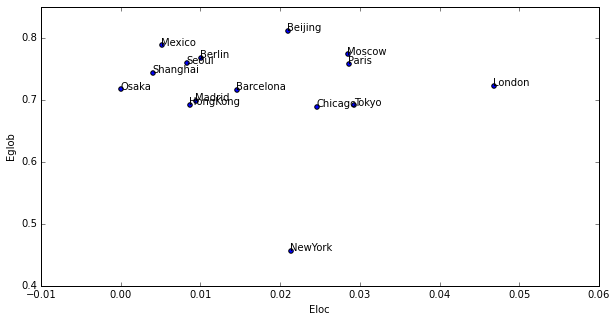

In [13]:
fig = plt.figure(figsize=(10, 5),facecolor='white')
ax = fig.add_subplot(1,1,1)
Elocs = [i + 0.000001 for i in Elocs]
ax.scatter(Elocs, Eglobs, c = 'b')
for i,j in enumerate(citylist):
    plt.text(Elocs[i], Eglobs[i], j)
#ax.set_xticks([ i+0.5 for i in range(len(citylist))])
#ax.set_xticklabels(citylist, rotation= 45)
plt.ylabel('Eglob')
plt.xlabel('Eloc')
#plt.xscale('log')
plt.show()

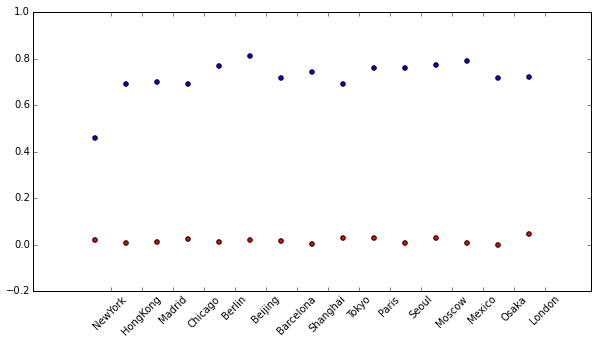

In [6]:
fig = plt.figure(figsize=(10, 5),facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.scatter(range(len(citylist)), Eglobs, c = 'b')
ax.scatter(range(len(citylist)), Elocs, c = 'r')
ax.set_xticks([ i+0.5 for i in range(len(citylist))])
ax.set_xticklabels(citylist, rotation= 45)
# plt.ylabel('Eglob')
# plt.yscale('log')
plt.show()

### Ground truth: compute in a three-nodes graph

In [7]:
import networkx as nx
import string
from math import *

def dis(lat1,lon1,lat2,lon2):
    R = 6373.0 # convert Earth's radius in kilometers
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

def calculate_e_global_with_weight(G):
    E = 0.0
    Eid = 0.0
    lats = nx.get_node_attributes(G, 'lat')
    lons = nx.get_node_attributes(G, 'lon')
    # compute shortest path lengths in weighted network
    path_lengths = nx.shortest_path_length(G, weight = 'geodistance')
    for i in path_lengths.values():
        for j in i.values():
            if j != 0:
                E += 1.0 / j
    # compute the efficieny in ideal G
    for x in G.nodes():
        for y in G.nodes():
            if x != y:
                l = dis(string.atof(lats[x]), 
                        string.atof(lons[x]), 
                        string.atof(lats[y]), 
                        string.atof(lons[y]))
                if l != 0:
                    Eid += 1.0 / l
    # normalize E
    if Eid != 0:
        E = E / Eid
    else:
        E = 0
    return E
    
def calculate_e_local_with_weight(G):
    avg = 0.0
    for node in G:
        # build a subgraph using neighbors of current node
        subGraph = G.subgraph(nx.bfs_successors(G,node)[node])
        avg += calculate_e_global_with_weight(subGraph)
    avg = avg/len(G)
    return avg

G=nx.Graph() 
G.add_node(1, lat = 22.28021, lon = 114.183482)
G.add_node(2, lat = 22.400365, lon = 114.202883)
G.add_node(3, lat = 22.382844, lon = 114.203477)

lats = nx.get_node_attributes(G, 'lat')
lons = nx.get_node_attributes(G, 'lon')

G.add_edge(1, 2, geodistance = dis(string.atof(lats[1]), 
                     string.atof(lons[1]), 
                     string.atof(lats[2]), 
                     string.atof(lons[2]))) 
G.add_edge(2, 3, geodistance = dis(string.atof(lats[2]), 
                     string.atof(lons[2]), 
                     string.atof(lats[3]), 
                     string.atof(lons[3])))

print " Eglob = ", calculate_e_global_with_weight(G)
print " Eloc = ",calculate_e_local_with_weight(G)

 Eglob =  0.968002367909
 Eloc =  0.0


In [8]:
import networkx as nx
import string
from math import *

def dis(lat1,lon1,lat2,lon2):
    R = 6373.0 # convert Earth's radius in kilometers
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

G=nx.Graph() 
G.add_node(1, lat = 22.28021, lon = 114.183482)
G.add_node(2, lat = 22.400365, lon = 114.202883)
G.add_node(3, lat = 22.382844, lon = 114.203477)

lats = nx.get_node_attributes(G, 'lat')
lons = nx.get_node_attributes(G, 'lon')

G.add_edge(1, 2) 
G.add_edge(2, 3)

d12 = dis(string.atof(lats[1]), 
          string.atof(lons[1]), 
          string.atof(lats[2]), 
          string.atof(lons[2]))
d23 = dis(string.atof(lats[2]), 
          string.atof(lons[2]), 
          string.atof(lats[3]), 
          string.atof(lons[3]))
d13 = dis(string.atof(lats[1]), 
          string.atof(lons[1]), 
          string.atof(lats[3]), 
          string.atof(lons[3]))

E = (1/d12 + 1/d23 + 1/(d12+d23))/(3*2)
Eid = (1/d12 + 1/d23 + 1/d13)/(3*2)

print "Eglob = ", E / Eid

# compute Eloc
# for each node in G, their neighbors are all separated and cannot build a subgraph, so EG1, EG2 and EG3 are all equals to 0
EG1 = 0.0
EG2 = 0.0
EG3 = 0.0
print "Eloc = ", (EG1+EG2+EG3)/3

Eglob =  0.968002367909
Eloc =  0.0
